In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [47]:
df = pd.read_csv('1.01. Simple linear regression.csv')
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [48]:
df.shape

(84, 2)

In [49]:
df.isna().sum()

SAT    0
GPA    0
dtype: int64

In [50]:
x = df[['SAT']]
y = df['GPA']

<AxesSubplot:xlabel='GPA'>

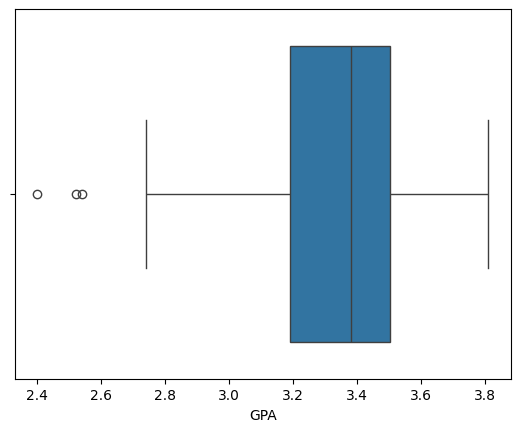

In [51]:
sns.boxplot(x=df['GPA'])

In [52]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

outliers = (df < lower_fence) | (df > upper_fence)

print(outliers.sum())

SAT    0
GPA    3
dtype: int64


<AxesSubplot:xlabel='GPA'>

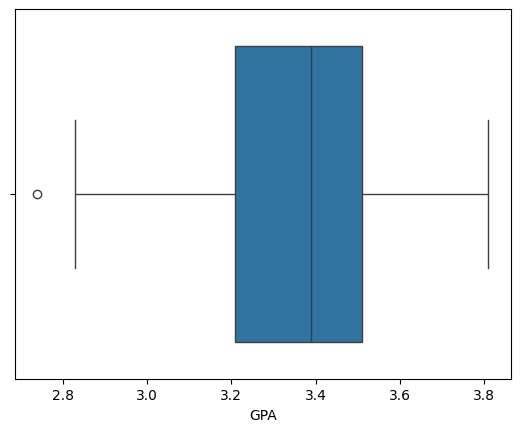

In [53]:
df_cleaned = df[~((df < lower_fence) | (df > upper_fence)).any(axis=1)]
sns.boxplot(x=df_cleaned['GPA'])

In [54]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

outliers = (df < lower_fence) | (df > upper_fence)

print(outliers.sum())

SAT    0
GPA    3
dtype: int64


<AxesSubplot:xlabel='GPA'>

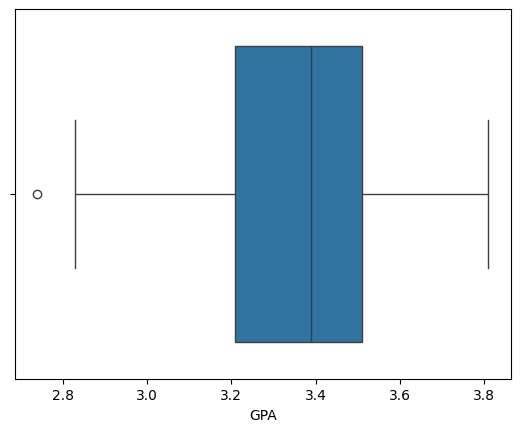

In [55]:
df_final = df[~((df < lower_fence) | (df > upper_fence)).any(axis=1)]
sns.boxplot(x=df_final['GPA'])

In [56]:
X = df_final[['SAT']]
Y = df_final['GPA']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(64, 1)
(17, 1)
(64,)
(17,)


In [57]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [58]:
y_pred = model.predict(x_test)

In [59]:
from sklearn import metrics

coefficient = model.coef_
intercept = model.intercept_

mse = metrics.mean_squared_error(y_test,y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)
r2score = metrics.r2_score(y_test,y_pred)
rss = ((y_pred-y_test)**2).sum()


print(coefficient)
print(intercept)
print(mse)
print(mae)
print(r2score)
print(rss)

[0.13268312]
3.3753124999999997
0.030796254449417117
0.13245208909192002
0.4091639756843285
0.523536325640091


In [60]:
# draw conf mat clf report and acc score

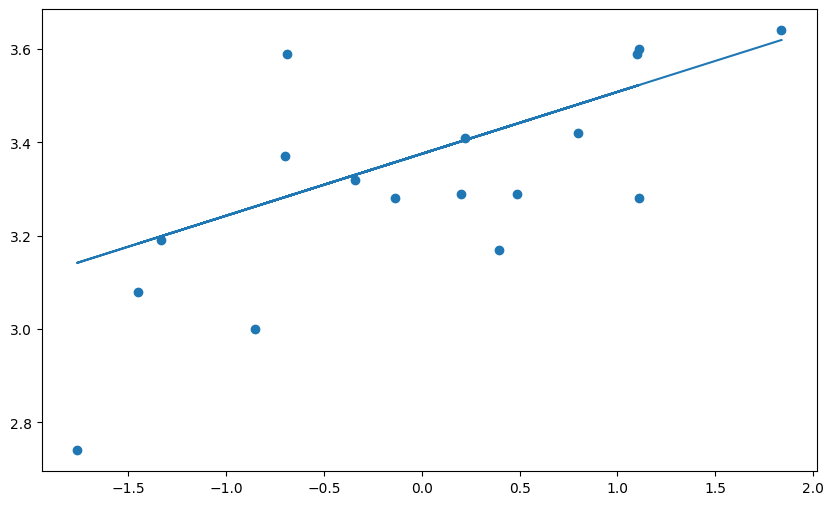

In [61]:
plt.figure(figsize=(10,6))
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred)
plt.show()